In [49]:
#%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import math
from typing import Callable


---

## Wykresy funkcji

Narysuj wykresy funkcji:

- $f(x) = 16 - 12 x - 8 x^2 + 3 x^3 + x^4 $ dla $x\in[-4.2, 3.1]$ 
- $f(x) = sin(x) $ dla $x\in(-2\pi, 2\pi)$ 
- $f(x) = sin(x) cos(2x) $ dla $x\in(0, 5\pi)$ 

---

- Opisz osie wykresów
- Dodaj do każdego wykresu siatkę i "legendę"
- Ustaw sensowny rozmiar wykresu


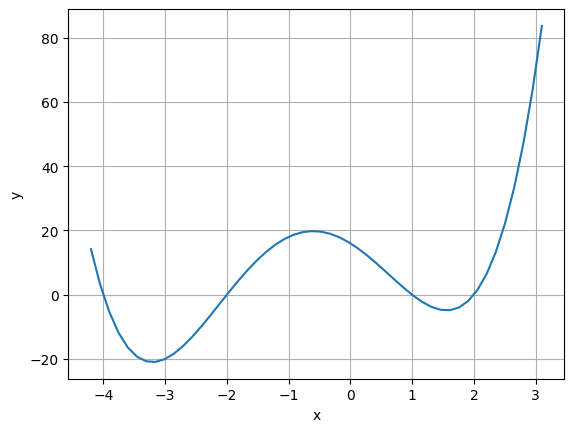

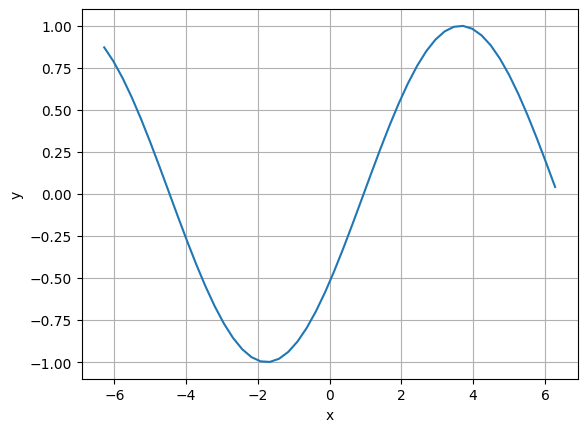

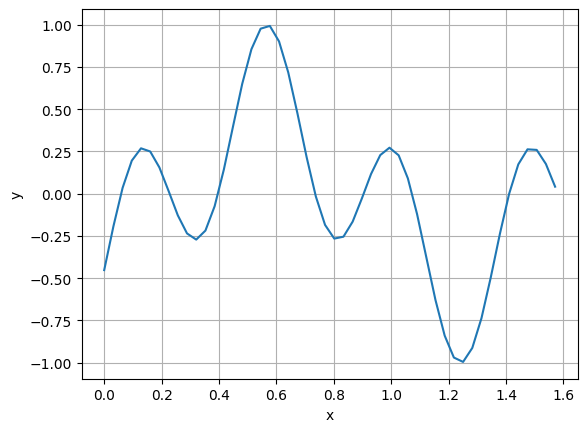

In [50]:


def plot_wrapper(x_vals: np.linspace, y_generator):
    plt.figure()
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(x_vals, [y_generator(x) for x in f1_x])

f1_x = np.linspace(-4.2, 3.1)
f1_y = lambda x: 16 - (12 * x) - (8 * x**2) + (3 * x**3) + (x**4)

plot_wrapper(f1_x, f1_y)


f2_x = np.linspace(-2 * math.pi, 2 * math.pi)
f2_y = lambda x: math.sin(x) 

plot_wrapper(f2_x, f2_y)


f3_x = np.linspace(0, 0.5 * math.pi)
f3_y = lambda x: math.sin(x) * math.cos(2 * x) 

plot_wrapper(f3_x, f3_y)



---
## Zadanie
Rozwiąż graficznie nierówność $f(x) < g(x)$, gdzie
$$ f(x) = x^2-3x-6 $$
$$ g(x) = \cos(x) $$

Zaznacz obszar ograniczony przez te krzywe.
Wykres z rozwiązaniem powinien wyglądać mniej więcej tak (u Was będzie inny!):

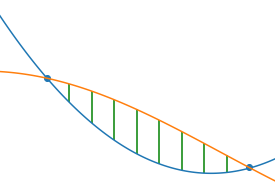

$ x \in (-20, 70) $  (uwaga - to NIE jest poprawne rozwiązanie - macie je sami znaleźć ;) )

[1997 9126] [-1.40224022  4.30153015]


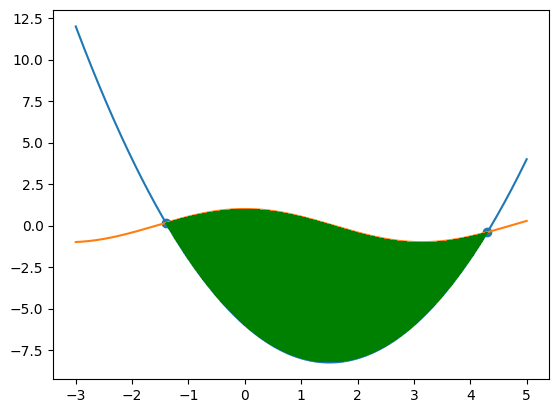

In [51]:
# generujemy wektor wartości x
x=np.linspace(-3, 5, 10000)

# obliczamy wartości f(x) i g(x) dla wygenerowanego zakresu x
# ale najpierw zdefiniujmy je sobie jako "prawdziwe" Pythonowe funkcje

def fun_f(x):
    return x**2-3*x-6

def fun_g(x):
    return np.cos(x)


# teraz zamiast wpisywać wzór - możemy posługiwać się "nazwą" naszej funkcji
y1 = fun_f(x)
y2 = fun_g(x)

# rysujemy wyresy obu funkcji
plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)


# eksperymentujemy z zakresem x - tak aby dobrze widoczne były punkty przecięcia

# jak już je znajdziemy - wpisujemy je do poniższej zmiennej

# zaznaczcie "kropkami" punkty przecięcia tych wykresów

# https://stackoverflow.com/questions/28766692/intersection-of-two-graphs-in-python-find-the-x-value

idx = np.argwhere(np.diff(np.sign(y1 - y2))).flatten()  # fix -- add more resolution
zakres = np.array([x[val] for val in idx])
print(idx, zakres)
# # rysujemy wykres punktowy
plt.scatter(x[idx], fun_f(x[idx]))  # obojętne której funkcji użyjemy - dla tych punktów powinny być sobie "prawie" równe

# # jak już oszacujecie zakres wartości x dla których warunek jest prawdziwy, to możecie go na wykresie "zakreskować" stosując
# # poniższą sztuczkę

# # generujemy wektor xx dla wartości z wcześniej oszacowanego zakresu. Nie generujemy zbyt wielu elementów
xx = np.linspace(zakres[0], zakres[1], 1000)

# # do y_min wstawiamy wartości funkcji z leżącej "niżej" (dla wartości z zakresu - czyli dla xx)
y_min = fun_f(xx)

# # do y_max wstawiamy wartości funkcji z leżącej "wyżej"
y_max = fun_g(xx)

# # rysujemy pionowe kreseczki
plt.vlines(xx, y_min, y_max, color='g')

---
## Wykresy słupkowe i histogramy

Tablica oceny zawiera stopnie Waszych starszych kolegów z kursu Podstawy Programowania (TEL 2020). Kolumna pierwsza zawiera ocenę z wykładu, kolumna druga - z laboratorium.

Proszę narysować histogramy ocen z wykładu i z laboratorium. UWAGA - proszę przeczytać dokumentację funkcji ```np.hist``` i zwrócić szczególną uwagę na parametr ```bins```

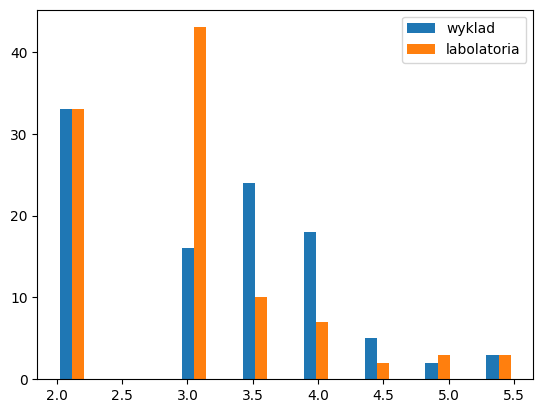

In [52]:
oceny = np.array([[2.0,2.0], [4.0,3.5], [4.0,3.0], [3.5,3.5], [5.5,5.5], [2.0,2.0], [3.0,3.0], [5.0,5.0], [4.0,3.5], 
                  [4.0,4.0], [2.0,2.0], [4.0,3.0], [3.0,3.0], [2.0,2.0], [4.0,3.0], [5.5,5.0], [2.0,2.0], [2.0,2.0], 
                  [2.0,2.0], [2.0,2.0], [2.0,2.0], [4.0,3.5], [3.0,3.0], [5.5,5.5], [3.0,3.0], [3.5,3.0], [4.5,4.0], 
                  [4.0,3.0], [3.0,3.0], [4.0,3.5], [3.5,3.0], [2.0,2.0], [2.0,2.0], [3.5,3.0], [3.0,3.0], [3.0,3.0], 
                  [2.0,2.0], [3.5,3.0], [4.5,4.0], [3.5,3.0], [3.0,3.0], [2.0,2.0], [4.0,4.5], [3.5,3.0], [3.5,3.0], 
                  [3.5,3.0], [3.5,3.5], [4.0,3.5], [3.5,3.0], [3.0,3.0], [2.0,2.0], [2.0,2.0], [3.0,3.0], [2.0,2.0], 
                  [4.0,3.0], [4.0,4.5], [3.5,3.5], [3.5,3.0], [4.5,4.0], [2.0,2.0], [2.0,2.0], [4.0,3.0], [5.0,5.0], 
                  [4.0,3.0], [3.0,3.0], [3.0,3.0], [3.0,3.0], [2.0,2.0], [3.5,3.0], [2.0,2.0], [3.5,3.0], [4.0,4.0], 
                  [2.0,2.0], [3.5,3.0], [3.5,3.0], [2.0,2.0], [2.0,2.0], [2.0,2.0], [3.5,3.0], [4.5,4.0], [2.0,2.0], 
                  [4.0,4.0], [2.0,2.0], [4.5,5.5], [2.0,2.0], [3.5,3.5], [2.0,2.0], [3.5,3.0], [2.0,2.0], [2.0,2.0], 
                  [2.0,2.0], [4.0,3.0], [3.0,3.0], [3.5,3.5], [3.0,3.0], [2.0,2.0], [2.0,2.0], [3.5,3.0], [3.0,3.0], 
                  [3.5,3.0], [3.5,3.0]])

W = oceny[:, 0]
L = oceny[:, 1]

bins = np.linspace(2,5.5,16)
plt.hist([W, L], bins=bins, label=["wyklad", "labolatoria"])
plt.legend(loc="upper right")

---
## Wykresy kołowe 

Narysuj wykres kołowy, pokazujący ile osób zaliczyło kurs z Podstaw Programowania

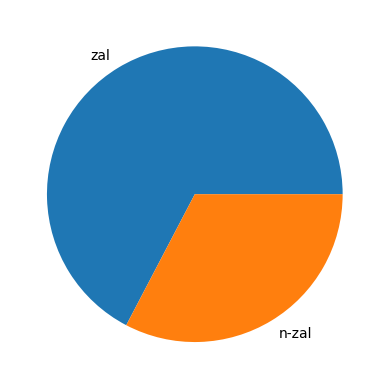

In [53]:
# trzeba policzyć ile osób NIE zaliczyło kursu
# można to zrobić na bardzo wiele sposobów, ale chyba najprościej można to zrobić tak:

nzal = len(W[W==2.0])

# inne możliwości
# nz = len ( np.where(W==2) )
# nz = np.count_nonzero(W==2)
# nz = (W==2).sum()

# trzeba sprawdzić ile jest elementów "pozytywnych" - można użyć warunku >= 3.0
zal = len(W[W > 2.0])

# zamiast 10 i 20 wstaw obliczone wcześniej wartości (zmienne)
plt.figure()
plt.pie([zal, nzal], labels=['zal', 'n-zal'])
plt.show()

---

### Narysuj wykres kołowy ilustrujący rozkład wszystkich ocen z laboratorium

Powinniście otrzymać mniej więcej taki rezultat:

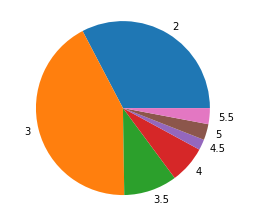

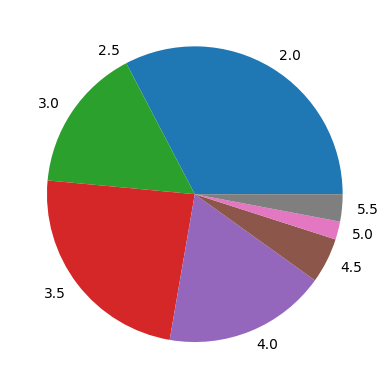

In [54]:
grades = [2 + 0.5 * x for x in range(8)]
results = [len(W[W == g]) for g in grades]

plt.figure()
plt.pie(results, labels=[str(g) for g in grades])
plt.show()

# Zadanie domowe !

## Badanie procesów ładowania i rozładowania kondensatora

Na podstawie instrukcji:
    
https://pracowniefizyczne.up.krakow.pl/wp-content/uploads/sites/3/2018/02/E9_Kondesator_instrukcja.pdf

Narysuj wykresy napięć ładowania i rozładowania kondensatora w czasie dla wybranych wartości C i R:

- $C=470\mu F$
- $C=940\mu F$
- $R=6,25k\Omega$

Dobierz zakres czasu tak, aby wykres był czytelny. Przyjmij napięcie zasilania $U_Z = 6V$

Pamiętaj, o dodaniu do wykresu wszystkich niezbędnych elementów!
    

0.00047
0.00094
0.00047
0.00094


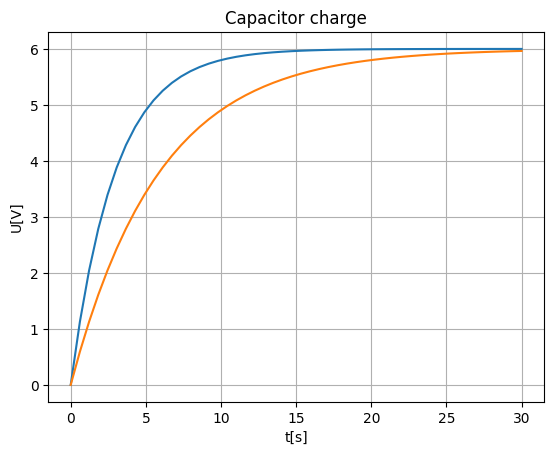

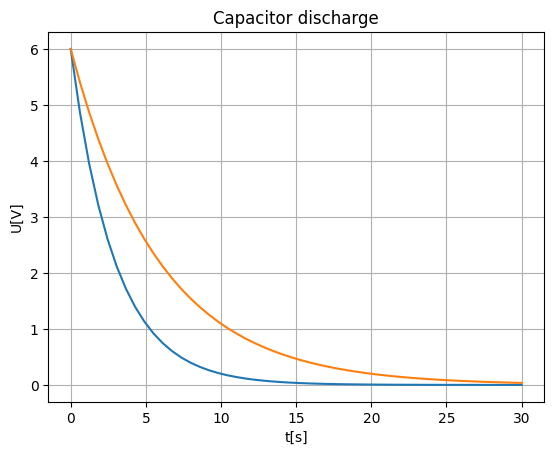

In [59]:
source_voltage = 6.0
resitance = 6_250
capacity_1 = 4.7e-4 # 470uF = 470 * 10^(-6)F = 4.7 * 10^(-4)F
capacity_2 = 9.4e-4

def charging_voltage(capacity):
    print(capacity)
    return lambda t: source_voltage * (1 - np.exp((-t) / (resitance * capacity)))

def discharging_voltage(capacity):
    print(capacity)
    return lambda t: source_voltage * np.exp((-t) / (resitance * capacity))

def plot_wrapper(x_vals: np.linspace, title: str,  generators: Callable[[float], float]):
    plt.figure()
    plt.grid()
    plt.xlabel("t[s]")
    plt.ylabel("U[V]")
    plt.title(title)

    for generator in generators:
        plt.plot(x_vals, [generator(x) for x in x_vals])

x = np.linspace(0, 30)
plot_wrapper(x, "Capacitor charge", [charging_voltage(capacity_1), charging_voltage(capacity_2)])
plot_wrapper(x, "Capacitor discharge", [discharging_voltage(capacity_1), discharging_voltage(capacity_2)])

plt.show()